In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

c:\Users\zeyad-mohamed\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 19.6k/19.6k [00:00<00:00, 11.0MB/s]

Extracting files...
Path to dataset files: C:\Users\zeyad-mohamed\.cache\kagglehub\datasets\denkuznetz\taxi-price-prediction\versions\1


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = os.path.join(path, "taxi_trip_pricing.csv")

In [5]:
data = pd.read_csv(dataset)
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# trip fare 
 --> (trip distance X Per_KM_rate) + (Base_Fare) + (Per_Min_Rate X Trip_Duration_Minutes)  = Trip_Price
 

# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
data.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [11]:
data.describe(include='O')

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
count,950,950,950,950
unique,4,2,3,3
top,Afternoon,Weekday,Low,Clear
freq,371,655,397,667


In [12]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [13]:
data.shape

(1000, 11)

In [14]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {data[col].nunique()}")

Unique values in 'Time_of_Day': 4
Unique values in 'Day_of_Week': 2
Unique values in 'Traffic_Conditions': 3
Unique values in 'Weather': 3


In [20]:
data.duplicated().sum().sum()

np.int64(0)

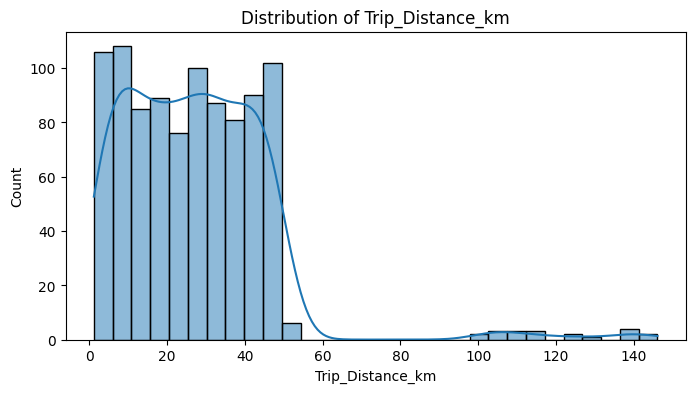

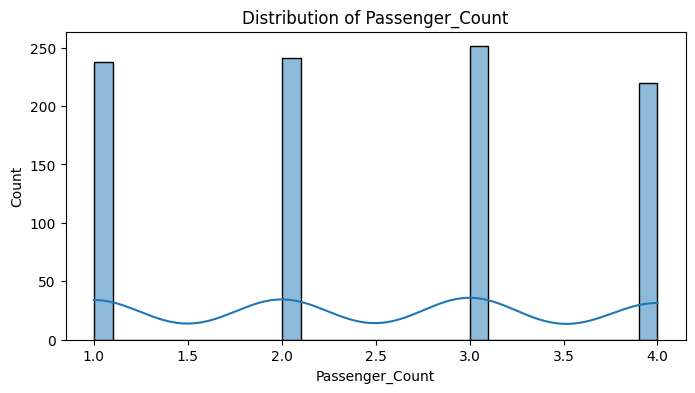

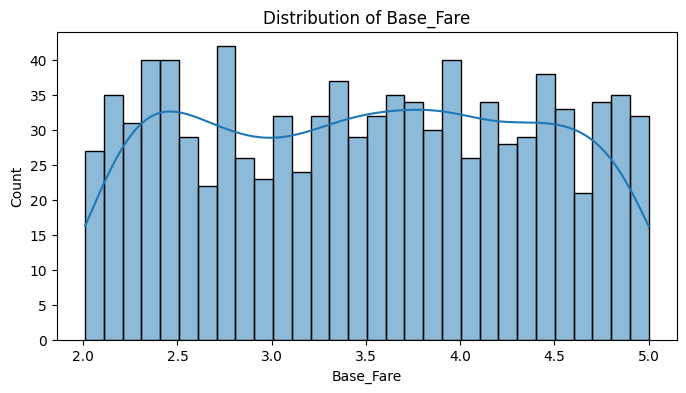

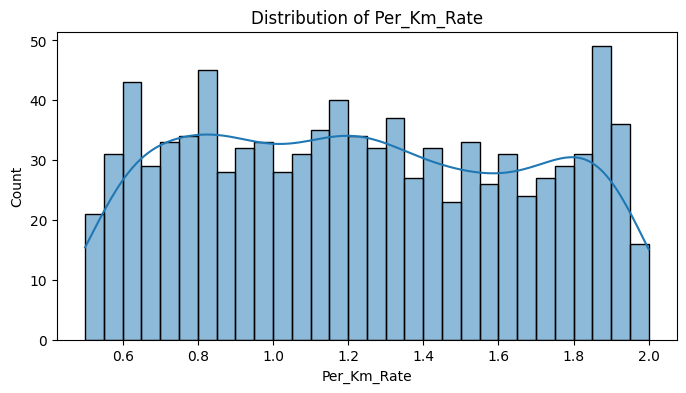

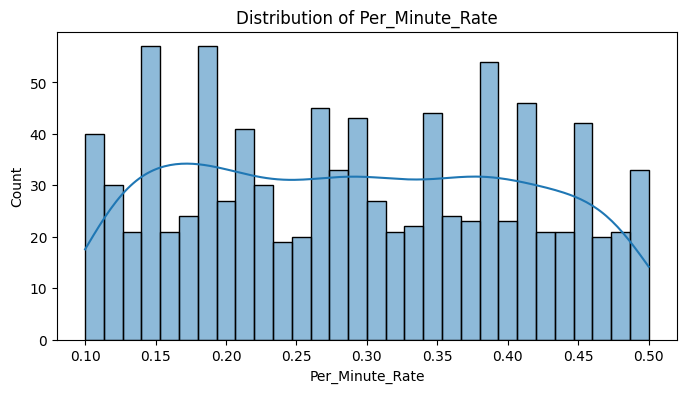

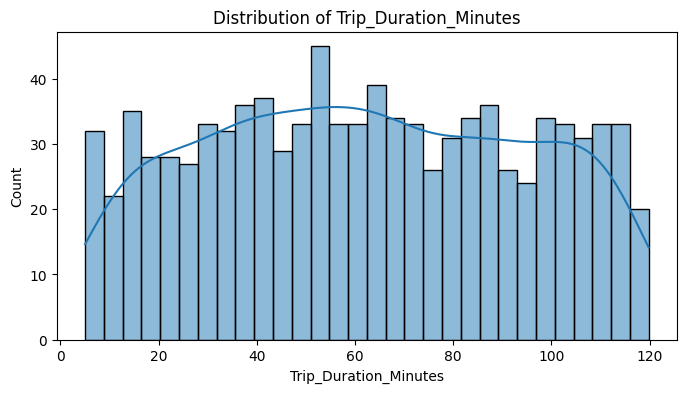

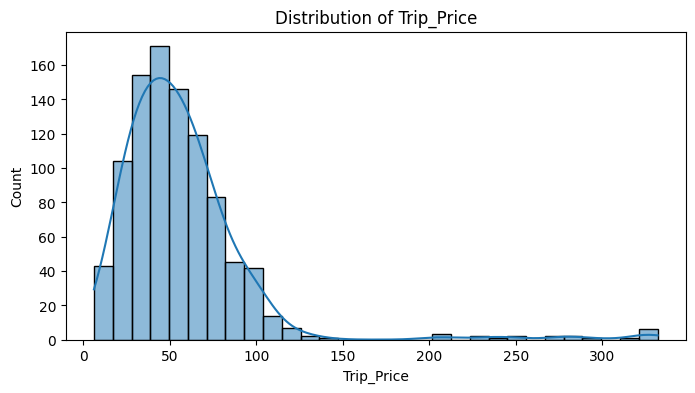

In [21]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

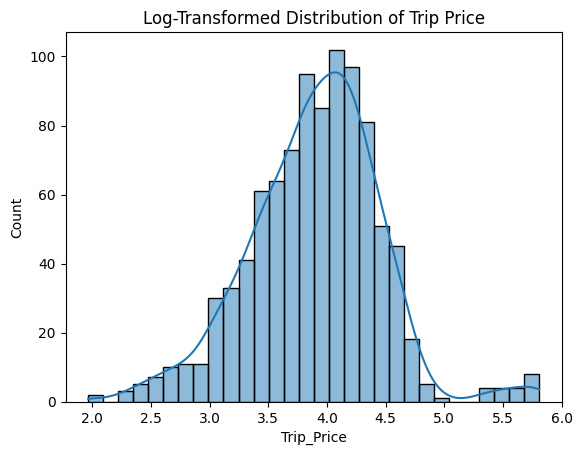

In [25]:
sns.histplot(np.log1p(data['Trip_Price']), bins=30, kde=True)
plt.title('Log-Transformed Distribution of Trip Price')
plt.show()

In [44]:
data['Transformed_Trip_Price'] = np.log1p(data['Trip_Price'])
data.drop('Trip_Price', axis=1, inplace=True)

In [45]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,3.617985
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,3.987190
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,3.623535
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,2.810486


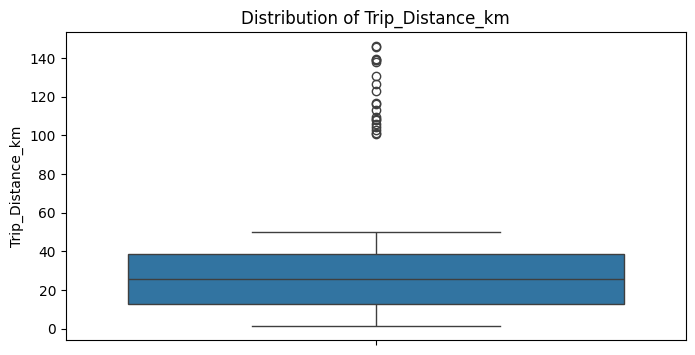

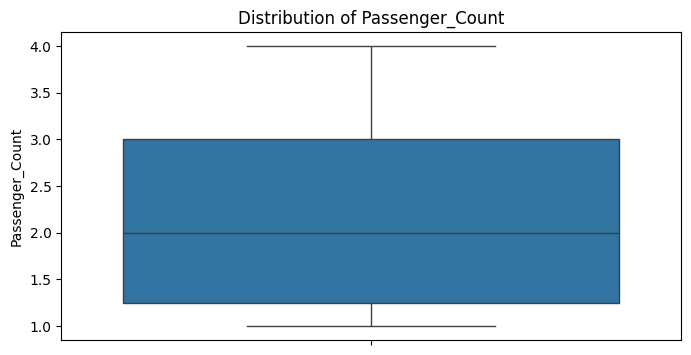

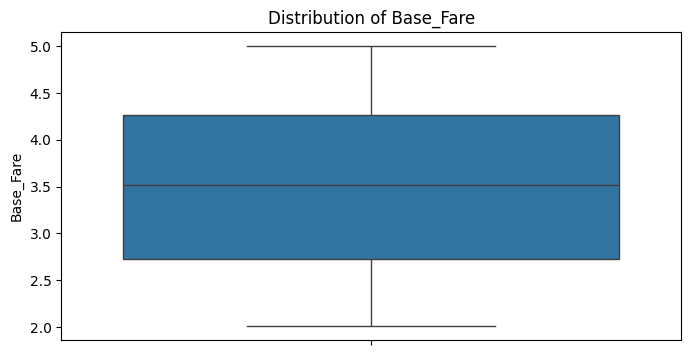

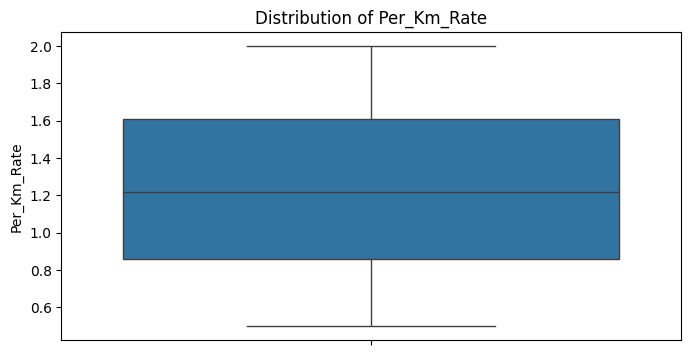

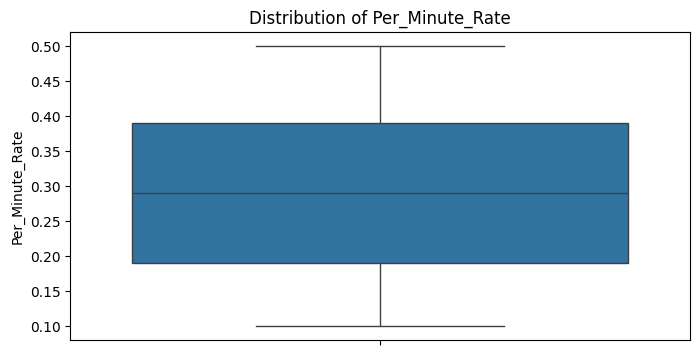

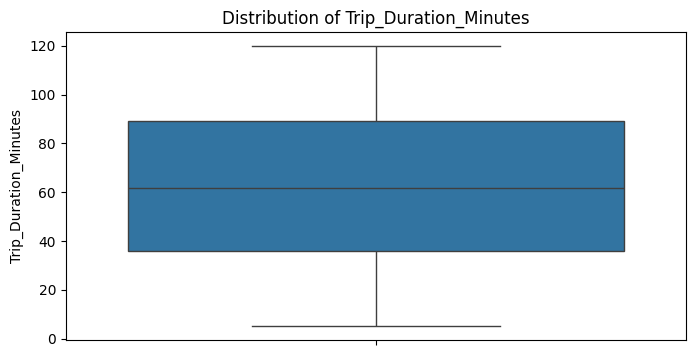

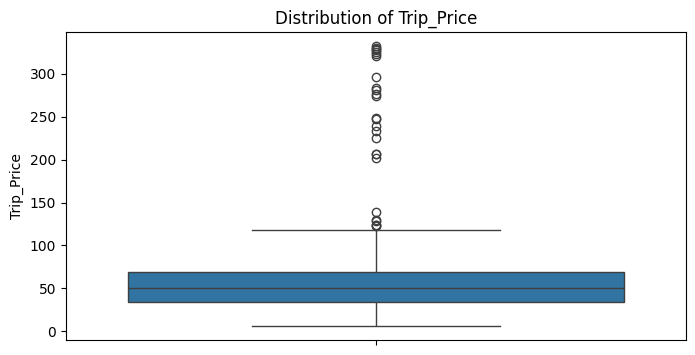

In [27]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')

Univariate Analysis


 We have outliers in [Trip_distance_KM, Trip_Price]

In [28]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [31]:
columns = ['Trip_Distance_km' ,'Trip_Price']
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')

Number of outliers in Trip_Distance_km: 20
Number of outliers in Trip_Price: 26


In [ ]:
outliers

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
267,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
268,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
287,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


In [37]:
data.drop(outliers.index, inplace=True)

In [38]:
data.shape

(974, 11)

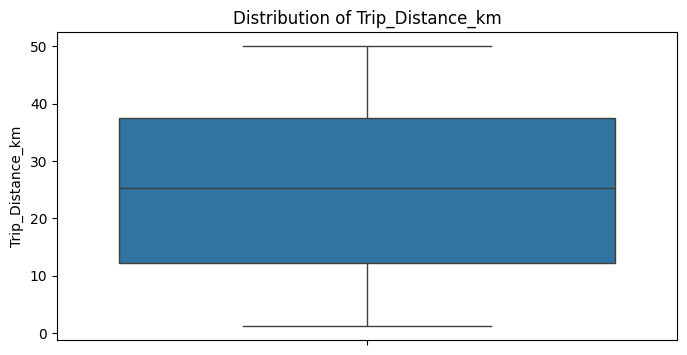

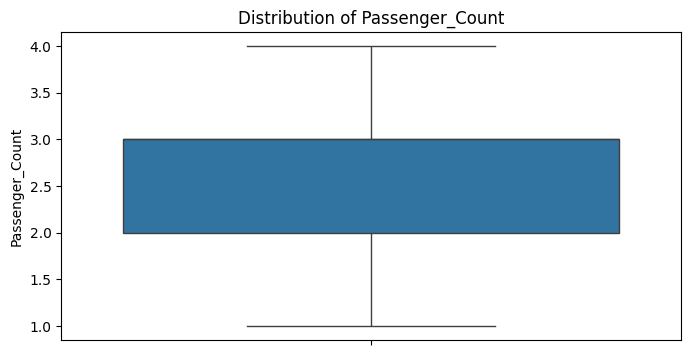

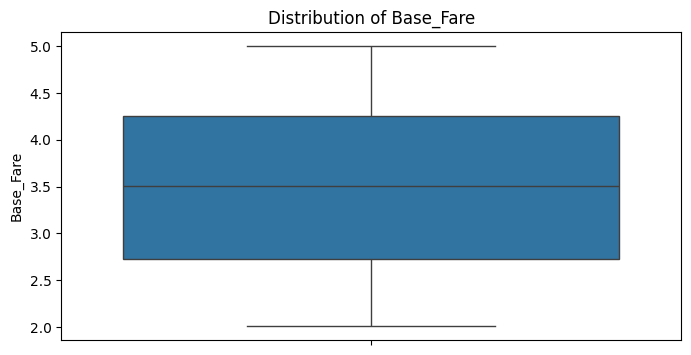

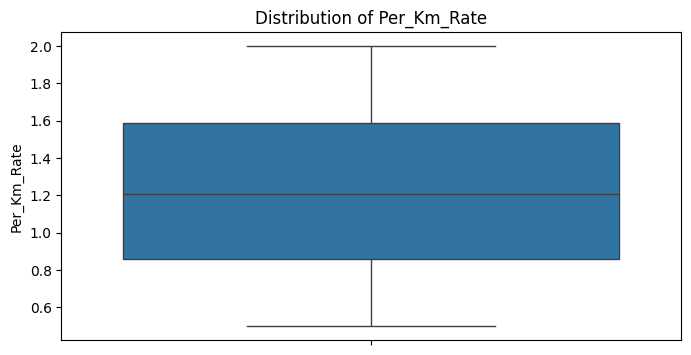

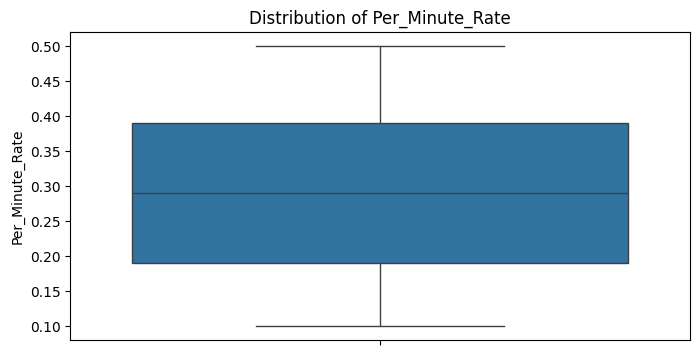

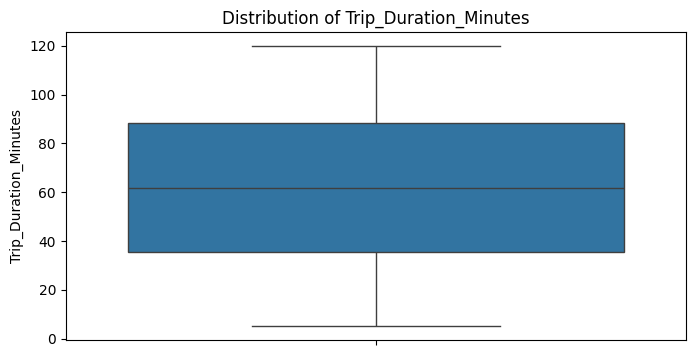

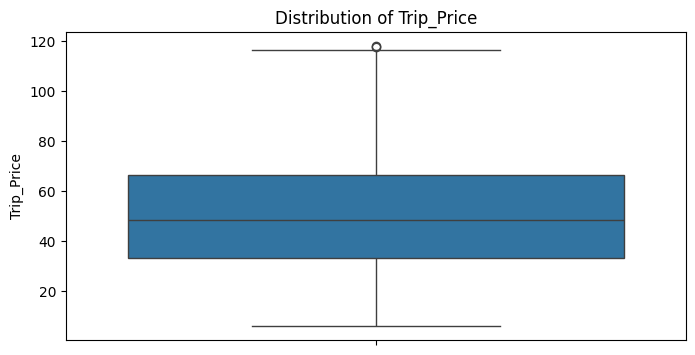

In [39]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')

Univariate Analysis


In [40]:
data.isna().sum()

Trip_Distance_km         49
Time_of_Day              48
Day_of_Week              49
Passenger_Count          49
Traffic_Conditions       50
Weather                  49
Base_Fare                49
Per_Km_Rate              48
Per_Minute_Rate          47
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Time_of_Day            926 non-null    object 
 2   Day_of_Week            925 non-null    object 
 3   Passenger_Count        925 non-null    float64
 4   Traffic_Conditions     924 non-null    object 
 5   Weather                925 non-null    object 
 6   Base_Fare              925 non-null    float64
 7   Per_Km_Rate            926 non-null    float64
 8   Per_Minute_Rate        927 non-null    float64
 9   Trip_Duration_Minutes  924 non-null    float64
 10  Trip_Price             925 non-null    float64
dtypes: float64(7), object(4)
memory usage: 91.3+ KB


In [42]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [43]:
data.isna().sum()

Trip_Distance_km         49
Time_of_Day               0
Day_of_Week               0
Passenger_Count          49
Traffic_Conditions        0
Weather                   0
Base_Fare                49
Per_Km_Rate              48
Per_Minute_Rate          47
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [46]:
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(data[col].mean())

In [47]:
data.isna().sum()

Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Transformed_Trip_Price    0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        974 non-null    float64
 1   Time_of_Day             974 non-null    object 
 2   Day_of_Week             974 non-null    object 
 3   Passenger_Count         974 non-null    float64
 4   Traffic_Conditions      974 non-null    object 
 5   Weather                 974 non-null    object 
 6   Base_Fare               974 non-null    float64
 7   Per_Km_Rate             974 non-null    float64
 8   Per_Minute_Rate         974 non-null    float64
 9   Trip_Duration_Minutes   974 non-null    float64
 10  Transformed_Trip_Price  974 non-null    float64
dtypes: float64(7), object(4)
memory usage: 91.3+ KB


In [49]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,24.942811,2.484324,3.500324,1.227397,0.292805,61.869978,3.852267
std,13.970430,1.071457,0.846422,0.416331,0.112958,31.411216,0.488243
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,1.963876
25%,12.865000,2.000000,2.770000,0.870000,0.190000,36.635000,3.565576
50%,24.942811,2.484324,3.500324,1.227397,0.292805,61.869978,3.870204
75%,36.795000,3.000000,4.195000,1.560000,0.387500,87.477500,4.197173
max,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,4.779393


## Multivariate Analysis


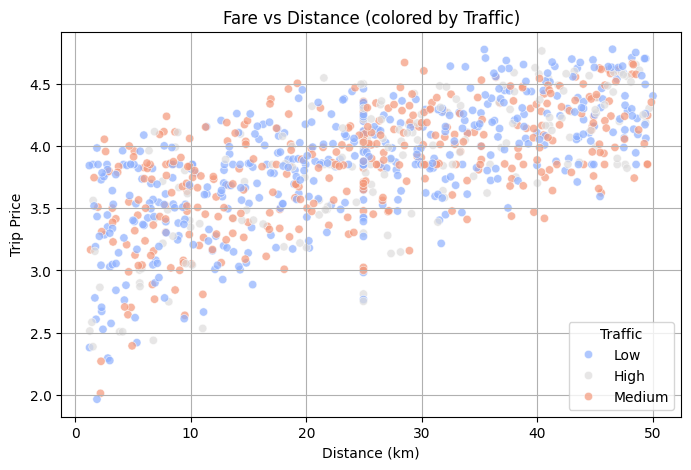

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Distance_km',
    y='Transformed_Trip_Price',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Fare vs Distance (colored by Traffic)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(True)
plt.show()

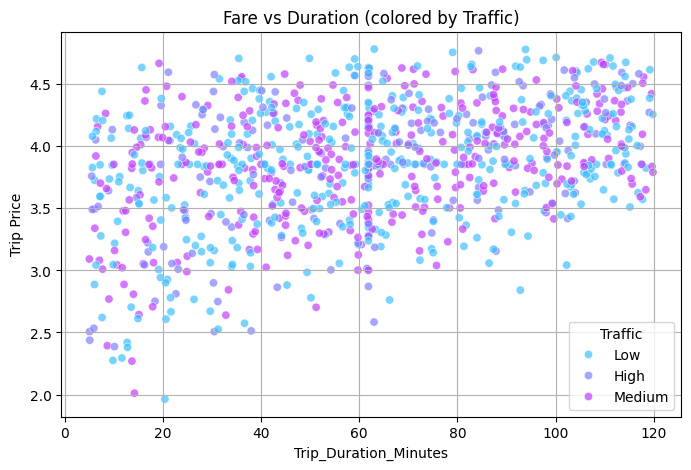

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Duration_Minutes',
    y='Transformed_Trip_Price',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='cool'
)
plt.title('Fare vs Duration (colored by Traffic)')
plt.xlabel('Trip_Duration_Minutes')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(True)
plt.show()

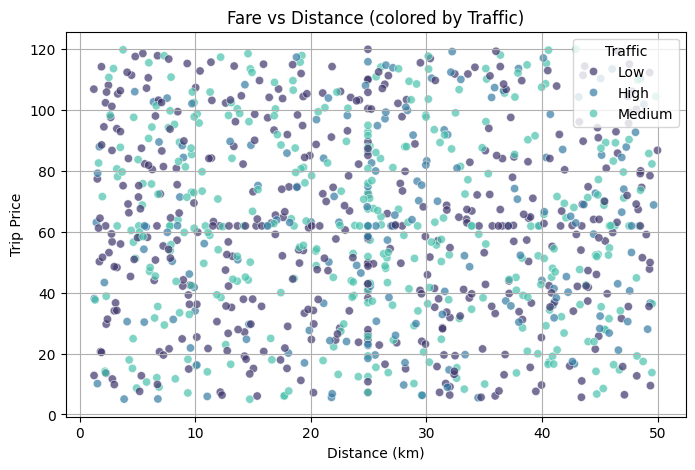

In [65]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Distance_km',
    y='Trip_Duration_Minutes',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='mako'
)
plt.title('Fare vs Distance (colored by Traffic)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(True)
plt.show()

# Feature Engineering

In [66]:

data['Trip_Duration_Hours'] = data['Trip_Duration_Minutes'] / 60
data['Avg_Speed_kmh'] = data['Trip_Distance_km'] / data['Trip_Duration_Hours']


data['Avg_Speed_kmh'] = data['Avg_Speed_kmh'].replace([np.inf, -np.inf], np.nan)
data.loc[data['Avg_Speed_kmh'] > 120, 'Avg_Speed_kmh'] = np.nan  # سرعة غير واقعية

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        974 non-null    float64
 1   Time_of_Day             974 non-null    object 
 2   Day_of_Week             974 non-null    object 
 3   Passenger_Count         974 non-null    float64
 4   Traffic_Conditions      974 non-null    object 
 5   Weather                 974 non-null    object 
 6   Base_Fare               974 non-null    float64
 7   Per_Km_Rate             974 non-null    float64
 8   Per_Minute_Rate         974 non-null    float64
 9   Trip_Duration_Minutes   974 non-null    float64
 10  Transformed_Trip_Price  974 non-null    float64
 11  Trip_Duration_Hours     974 non-null    float64
 12  Avg_Speed_kmh           914 non-null    float64
dtypes: float64(9), object(4)
memory usage: 106.5+ KB


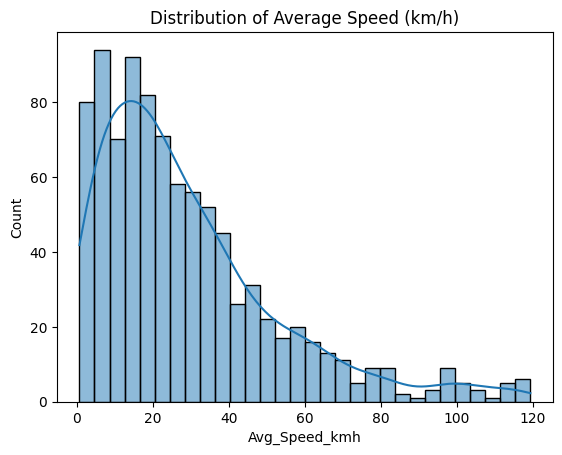

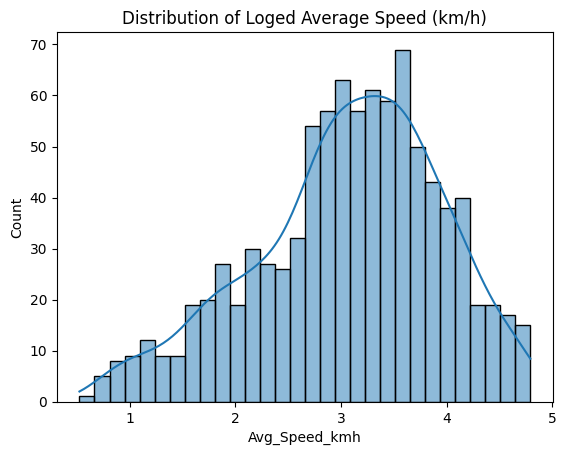

In [69]:
sns.histplot(data['Avg_Speed_kmh'], bins=30, kde=True)
plt.title('Distribution of Average Speed (km/h)')
plt.show()


sns.histplot(np.log1p(data['Avg_Speed_kmh']), bins=30, kde=True)
plt.title('Distribution of Loged Average Speed (km/h)')
plt.show()


In [70]:
data['Avg_Speed_kmh'].fillna(data['Avg_Speed_kmh'].median(), inplace=True)

C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_18620\1286860940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg_Speed_kmh'].fillna(data['Avg_Speed_kmh'].median(), inplace=True)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        974 non-null    float64
 1   Time_of_Day             974 non-null    object 
 2   Day_of_Week             974 non-null    object 
 3   Passenger_Count         974 non-null    float64
 4   Traffic_Conditions      974 non-null    object 
 5   Weather                 974 non-null    object 
 6   Base_Fare               974 non-null    float64
 7   Per_Km_Rate             974 non-null    float64
 8   Per_Minute_Rate         974 non-null    float64
 9   Trip_Duration_Minutes   974 non-null    float64
 10  Transformed_Trip_Price  974 non-null    float64
 11  Trip_Duration_Hours     974 non-null    float64
 12  Avg_Speed_kmh           974 non-null    float64
dtypes: float64(9), object(4)
memory usage: 106.5+ KB


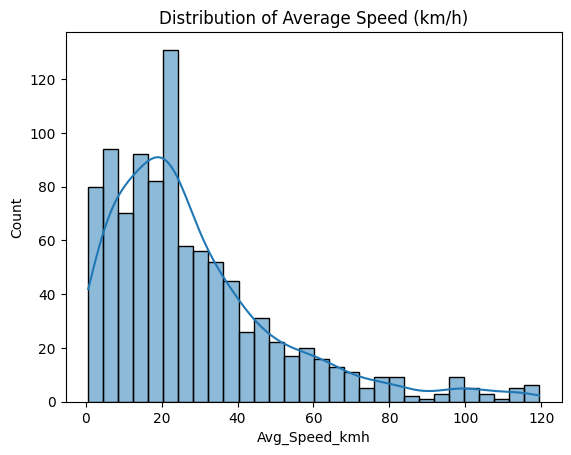

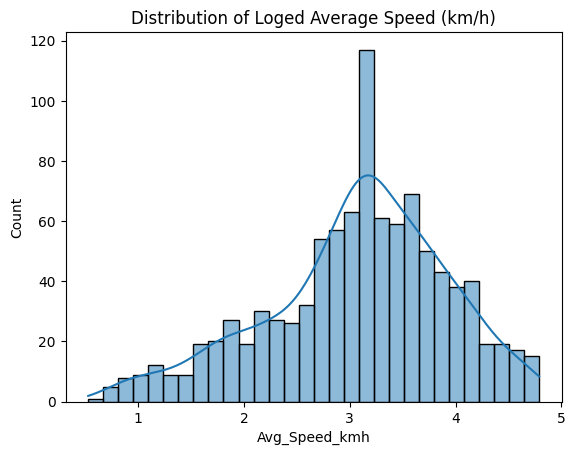

In [72]:
sns.histplot(data['Avg_Speed_kmh'], bins=30, kde=True)
plt.title('Distribution of Average Speed (km/h)')
plt.show()


sns.histplot(np.log1p(data['Avg_Speed_kmh']), bins=30, kde=True)
plt.title('Distribution of Loged Average Speed (km/h)')
plt.show()

In [73]:
data['Avg_Speed_kmh'] = np.log1p(data['Avg_Speed_kmh'])

In [75]:
data.describe(include='O')

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
count,974,974,974,974
unique,4,2,3,3
top,Afternoon,Weekday,Low,Clear
freq,409,684,437,701


In [76]:
data['Day_of_Week']

0      Weekday
1      Weekday
2      Weekend
3      Weekday
4      Weekday
        ...   
995    Weekend
996    Weekday
997    Weekday
998    Weekday
999    Weekend
Name: Day_of_Week, Length: 974, dtype: object

In [77]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price,Trip_Duration_Hours,Avg_Speed_kmh
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,3.617985,0.897000,3.116706
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.500324,0.62,0.43,40.57,3.852267,0.676167,4.268047
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,3.987190,0.621167,4.100261
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,3.623535,1.946833,2.808146
4,24.942811,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,2.810486,0.377333,4.206227
